In [1]:
#import datas

import pandas as pd
import numpy as np
all_data = pd.DataFrame()
df = pd.read_csv('./TrafficLabelling/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
all_data = all_data.append(df, ignore_index=True)

df = pd.read_csv('./TrafficLabelling/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
all_data = all_data.append(df, ignore_index=True)

df = pd.read_csv('./TrafficLabelling/Friday-WorkingHours-Morning.pcap_ISCX.csv')
all_data = all_data.append(df, ignore_index=True)

df = pd.read_csv('./TrafficLabelling/Monday-WorkingHours.pcap_ISCX.csv')
all_data = all_data.append(df, ignore_index=True)

df = pd.read_csv('./TrafficLabelling/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
all_data = all_data.append(df, ignore_index=True)

# df = pd.read_csv('./TrafficLabelling/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
# all_data = all_data.append(df, ignore_index=True)

df = pd.read_csv('./TrafficLabelling/Tuesday-WorkingHours.pcap_ISCX.csv')
all_data = all_data.append(df, ignore_index=True)

df = pd.read_csv('./TrafficLabelling/Wednesday-workingHours.pcap_ISCX.csv')
all_data = all_data.append(df, ignore_index=True)

print(all_data.shape)

# print(df.describe())
# print(df)
headers = list(df.columns)
print(headers)

(2660377, 85)
['Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN

In [2]:
#select a subset of columns
# df = pd.DataFrame(df, columns=['Source Port', 'Source Port', 'Destination IP', 'Destination Port', 'Label'])
# print(df.head())

In [3]:
headers = headers[7:]
headers = np.delete(headers, [13, 14, -1], 0)
X = all_data.iloc[:, 7:-1].values
y = all_data.iloc[:, -1].values
X = np.delete(X, [13, 14], 1)
# print(X)
# print(y[0])

In [4]:
# print(y[0] == 'BENIGN')
# for i in range(y.shape[0]):
#     if y[i] == 'BENIGN':
#         y[i] = 1
#     else:
#         y[i] = 0
# count = 0
# for i in range(y.shape[0]):
#     if y[i] == 1:
#         count +=1
# print(count)

# y = np.where(y == 'BENIGN', 0, 1)
# print(newY)
# count = 0
# for i in newY:
#     if newY[i] == 1:
#         count +=1
# print(count)

In [5]:
# print(newY)
# count = 0
# for i in range(newY.shape[0]):
#     if newY[i] == 0:
#         count +=1
# print(count)
# print(y.shape)

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X=X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [7]:
# print(np.all(np.isfinite(X))) #and gets False
# for i in range(X.shape[0]):
#     for j in range(X.shape[1]): 
#         if not np.isfinite(X[i][j]):
#             print(i, j, X[i][j])
# np.isfinite(X).all()
# np.argwhere(np.isnan(X))

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# from sklearn.svm import SVC
# classifier = SVC(kernel="linear")
# classifier.fit(X_train, y_train)

In [11]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
max_iter_group = np.arange(100, 10000, 500)
accuracy_score_results = []
for i in range(len(max_iter_group)):
    classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=max_iter_group[i])
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
    cm = confusion_matrix(y_test, y_pred)
    a = accuracy_score(y_test, y_pred)
    accuracy_score_results.append(a)

In [12]:
# classifier.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
k = []
a = accuracy_score(y_test, y_pred)
k.append(a)
print(k)

[0.9380627328927947]


In [14]:
# y_pred = classifier.predict(X_test)
# print(y_pred)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
# print(cm)
accuracy_score(y_test, y_pred)

0.9380627328927947

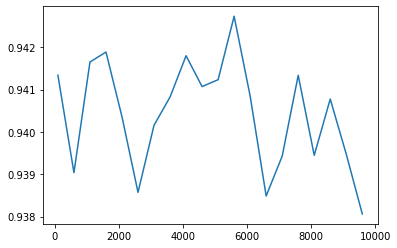

In [16]:
import matplotlib.pyplot as plt
plt.plot(max_iter_group, accuracy_score_results)
plt.show()

c:\users\cascasm\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\cascasm\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\cascasm\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\cascasm\appdata\local\programs\python\python39\lib\site-pa

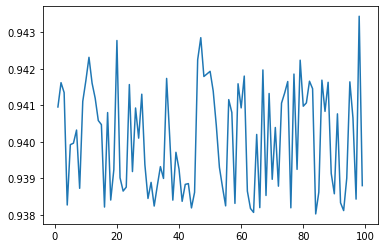

In [17]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
max_iter_group = np.arange(1, 100, 1)
accuracy_score_results = []
for i in range(len(max_iter_group)):
    classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=max_iter_group[i])
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
    cm = confusion_matrix(y_test, y_pred)
    a = accuracy_score(y_test, y_pred)
    accuracy_score_results.append(a)
plt.plot(max_iter_group, accuracy_score_results)
plt.show()

In [27]:
df = pd.read_csv('./Friday-23-02-2018_TrafficForML_CICFlowMeter.csv')
X = df.iloc[:, 7:-1].values
y = df.iloc[:, -1].values
X = np.delete(X, [13, 14], 1)

In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X=X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

y_pred = classifier.predict(X)
cm = confusion_matrix(y, y_pred)
# print(cm)
accuracy_score(y, y_pred)

ValueError: Input contains infinity or a value too large for dtype('float64').

In [21]:
print(y_pred.shape)

(2660377,)


In [22]:
print(y.shape)

(2660377,)


In [23]:
cm = confusion_matrix(y, y_pred)

In [24]:
print(cm)

[[2061190       0     805     621    1218     984     132      44       0
        0   39917       0]
 [   1476       0       0       0       0       0       0       0       0
        0     490       0]
 [  14530       0  113344      90      63       0       0       0       0
        0       0       0]
 [   4804       0       0    5246     242       1       0       0       0
        0       0       0]
 [  75887       0     407     361  154404      14       0       0       0
        0       0       0]
 [   4475       0       0       0       1     978      45       0       0
        0       0       0]
 [   2908       0       1       0      72      88    2727       0       0
        0       0       0]
 [   7932       0       0       0       0       0       0       6       0
        0       0       0]
 [     10       0       0       1       0       0       0       0       0
        0       0       0]
 [     35       0       0       0       0       1       0       0       0
        0       0

In [25]:
accuracy_score(y, y_pred)

0.9379640554703337

In [26]:
from sklearn.metrics import f1_score
f1_score(y, y_pred, average='weighted')

0.9324245776367828